In [1]:
import json
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_columns = 80
pd.options.display.float_format = lambda x : "{:,.2f}".format(x)

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
train = pd.read_csv('raw_data/train.csv.zip', dtype={'Id':str})
test = pd.read_csv('raw_data/test.csv.zip', dtype={'Id':str})

train.shape, test.shape

((15120, 56), (565892, 55))

In [4]:
train.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  1       2596      51      3                               258   
1  2       2590      56      2                               212   
2  3       2804     139      9                               268   
3  4       2785     155     18                               242   
4  5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2  

In [5]:
(train.columns[:-1] == test.columns).all()

True

### Cleaning:

    1. Check and record column types
    2. Look for anomalies
    3. Fill Missing Values
    4. Identify Categoricals if any
    
It looks like most of the cleaning has been done for this one

All the datatypes are integers, there are no nulls and all categoricals have been binarized.

In [6]:
id_cols = train.columns[0]
cat_cols = train.columns[11:-1].tolist()
int_cols = train.columns[1:11].tolist()
target_col = train.columns[-1]

ftrs = int_cols + cat_cols

### Explore (and look for anomalies)

In [7]:
train.describe()

Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
count  15,120.00 15,120.00 15,120.00                         15,120.00   
mean    2,749.32    156.68     16.50                            227.20   
std       417.68    110.09      8.45                            210.08   
min     1,863.00      0.00      0.00                              0.00   
25%     2,376.00     65.00     10.00                             67.00   
50%     2,752.00    126.00     15.00                            180.00   
75%     3,104.00    261.00     22.00                            330.00   
max     3,849.00    360.00     52.00                          1,343.00   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
count                       15,120.00                        15,120.00   
mean                            51.08                         1,714.02   
std                             61.24                         1,325.07   
min                           -146.00                             0.00   
25%                              5.00                           764.00   
50%                             32.00                         1,316.00   
75%                             79.00                         2,270.00   
max                            554.00                         6,890.00   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
count      15,120.00       15,120.00      15,120.00   
mean          212.70          218.97         135.09   
std            30.56           22.80          45.90   
min             0.00           99.00           0.00   
25%           196.00          207.00         106.00   
50%           220.00          223.00         138.00   
75%           235.00          235.00         167.00   
max           254.00          254.00         248.00   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
count                           15,120.00         15,120.00         15,120.00   
mean                             1,511.15              0.24              0.03   
std                              1,099.94              0.43              0.18   
min                                  0.00              0.00              0.00   
25%                                730.00              0.00              0.00   
50%                              1,256.00              0.00              0.00   
75%                              1,988.25              0.00              0.00   
max                              6,993.00              1.00              1.00   

       Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
count         15,120.00         15,120.00   15,120.00   15,120.00   15,120.00   
mean               0.42              0.31        0.02        0.04        0.06   
std                0.49              0.46        0.15        0.20        0.24   
min                0.00              0.00        0.00        0.00        0.00   
25%                0.00              0.00        0.00        0.00        0.00   
50%                0.00              0.00        0.00        0.00        0.00   
75%                1.00              1.00        0.00        0.00        0.00   
max                1.00              1.00        1.00        1.00        1.00   

       Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
count   15,120.00   15,120.00   15,120.00   15,120.00   15,120.00   15,120.00   
mean         0.06        0.01        0.04        0.00        0.00        0.00   
std          0.23        0.10        0.20        0.00        0.01        0.03   
min          0.00        0.00        0.00        0.00        0.00        0.00   
25%          0.00        0.00        0.00        0.00        0.00        0.00   
50%          0.00        0.00        0.00        0.00        0.00        0.00   
75%          0.00        0.00        0.00        0.00        0.00        0.00   
max          1.00        1.00        1.00        0.00        1.00    

In [8]:
# check that count == len(train)
train.describe().loc['count'].unique(), len(train)

(array([15120.]), 15120)

In [9]:
# only 1 col with negative values
train.describe().loc[:,(train.describe().loc['min']<0).values]

Vertical_Distance_To_Hydrology
count                       15,120.00
mean                            51.08
std                             61.24
min                           -146.00
25%                              5.00
50%                             32.00
75%                             79.00
max                            554.00

In [10]:
# look for instance of high skew
# wilderness areas and soil types are binary so high skew means imbalanced distribution
high_skews = train.skew()[train.skew().abs()>1]
high_skews

Horizontal_Distance_To_Hydrology       1.49
Vertical_Distance_To_Hydrology         1.54
Horizontal_Distance_To_Roadways        1.25
Hillshade_9am                         -1.09
Horizontal_Distance_To_Fire_Points     1.62
Wilderness_Area1                       1.23
Wilderness_Area2                       5.23
Soil_Type1                             6.29
Soil_Type2                             4.62
Soil_Type3                             3.58
Soil_Type4                             3.87
Soil_Type5                             9.42
Soil_Type6                             4.51
Soil_Type8                           122.96
Soil_Type9                            38.85
Soil_Type10                            2.06
Soil_Type11                            5.85
Soil_Type12                            7.98
Soil_Type13                            5.37
Soil_Type14                            9.30
Soil_Type16                           11.39
Soil_Type17                            4.66
Soil_Type18                     

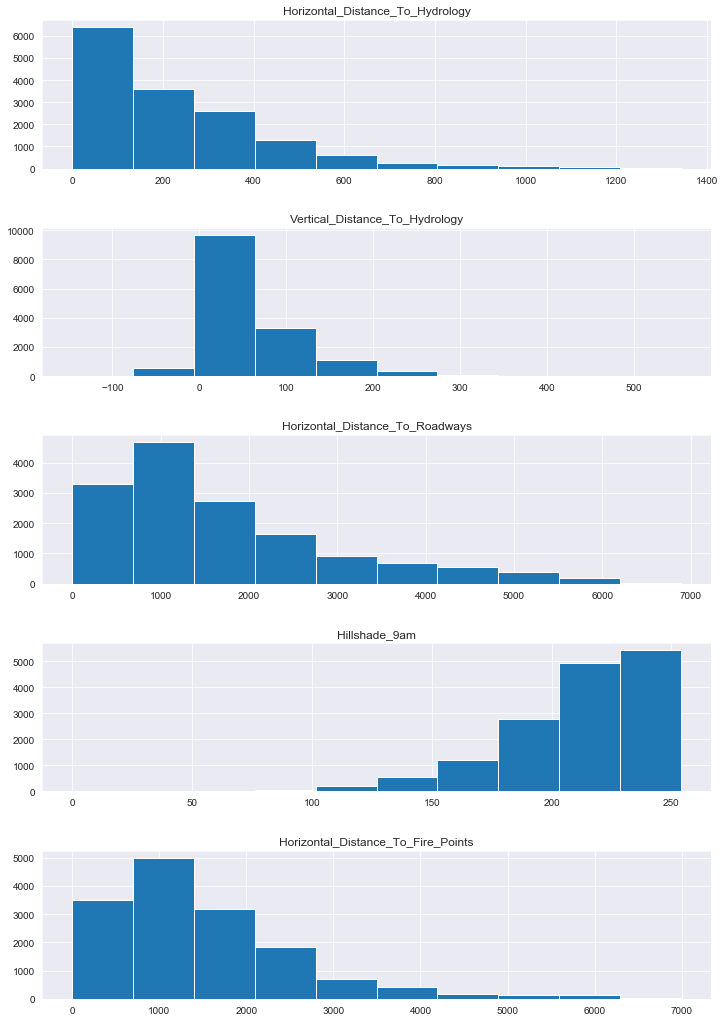

In [11]:
fig, axes = plt.subplots(5, figsize = (12,18))
plt.subplots_adjust(hspace=0.4)
for i,col in enumerate(high_skews.head().index):
    train[col].hist(ax=axes[i])
    axes[i].set_title(col)

In [12]:
# drop features with 0 variance
drop_ftrs = train.var()[train.var() == 0].index
print(drop_ftrs)
train.drop(drop_ftrs, axis=1, inplace=True)

# re-collect columns

cat_cols = [c for c in cat_cols if c not in drop_ftrs]
int_cols = [i for i in int_cols if i not in drop_ftrs]

ftrs = int_cols + cat_cols

Index(['Soil_Type7', 'Soil_Type15'], dtype='object')


In [13]:
# all classes equally represented
train.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

___Summary___:

    - Data is very clean already
    - Almost all features are positive integers
    - No nulls
    - Only a few numeric features with high skew, but many categorical variables with uneven distributions
    - Two categorical variables (SoilType 8 and 15) with 0 variance
    - No reason to believe that there are misakes in records

## Model Prep

    - Correlations
    - Feature Engineering
    - Feature Selection
    - Imbalanced Classes if applicable

#### Correlations

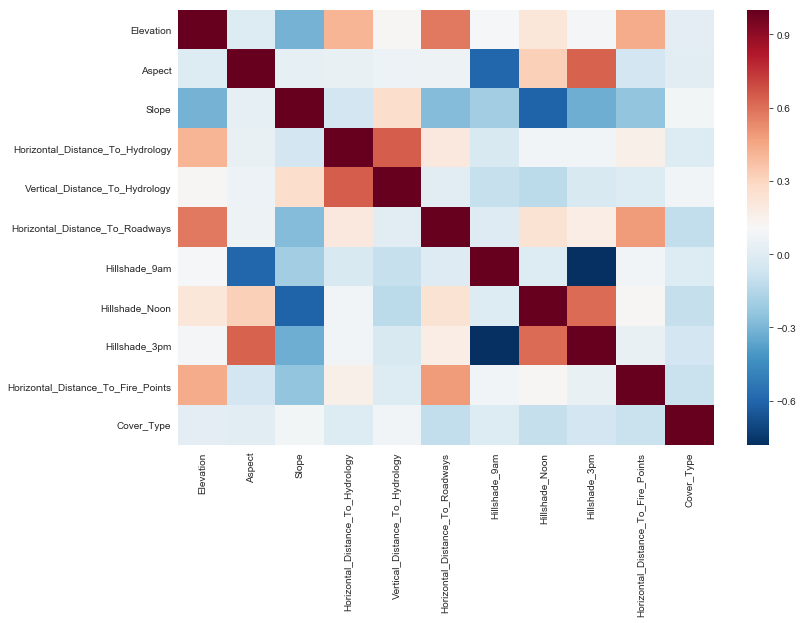

In [14]:
sns.heatmap(train[int_cols + [target_col]].corr(), cmap='RdBu_r')

In [15]:
# NOTE need to de-dupe
top_corrs = train[int_cols].corr().apply(lambda col: (col.nlargest(3).index.tolist()[1:], col.nlargest(3).values[1:]))
for f,t in top_corrs.items():
    print(f)
    print('\t'+str(t[0][0])+': '+str(t[1][0]))
    print('\t'+str(t[0][1])+': '+str(t[1][1]))
    print('-----------------------')
    print()

Elevation
	Horizontal_Distance_To_Roadways: 0.5786589907340067
	Horizontal_Distance_To_Fire_Points: 0.4435634307597476
-----------------------

Aspect
	Hillshade_3pm: 0.635022364019874
	Hillshade_Noon: 0.32491228925839755
-----------------------

Slope
	Vertical_Distance_To_Hydrology: 0.26531397615400654
	Aspect: 0.028147985303198328
-----------------------

Horizontal_Distance_To_Hydrology
	Vertical_Distance_To_Hydrology: 0.6521424712357364
	Elevation: 0.4127115202982467
-----------------------

Vertical_Distance_To_Hydrology
	Horizontal_Distance_To_Hydrology: 0.6521424712357364
	Slope: 0.26531397615400654
-----------------------

Horizontal_Distance_To_Roadways
	Elevation: 0.5786589907340067
	Horizontal_Distance_To_Fire_Points: 0.48638564505875065
-----------------------

Hillshade_9am
	Elevation: 0.0979002043303892
	Horizontal_Distance_To_Fire_Points: 0.07814412163752407
-----------------------

Hillshade_Noon
	Hillshade_3pm: 0.6145263872475779
	Aspect: 0.32491228925839755
---------

From below plots i'm noticing a few outliers:
    
    - Aspect (~210) Vs Hillshade3pm (0)
    - Aspect (~5) Vs HillshadeNoon (~115)
    - VerticalDistHydrology (>500) seems predictive though
    - Hillshade9am (0)
    - HillshadeNoone (>200) vs Hillshade3pm (0)
    

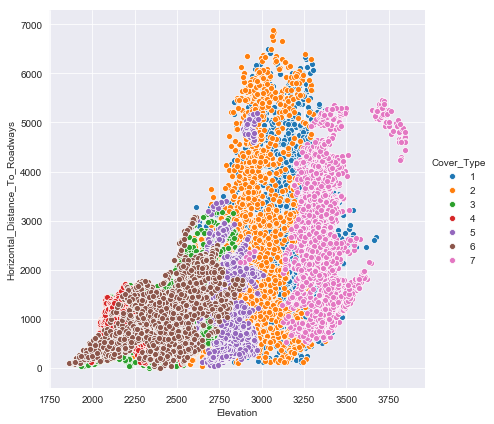

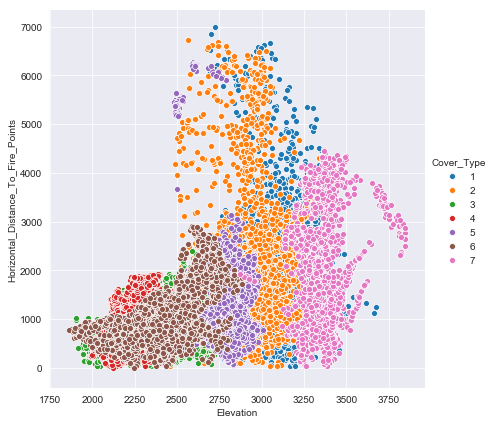

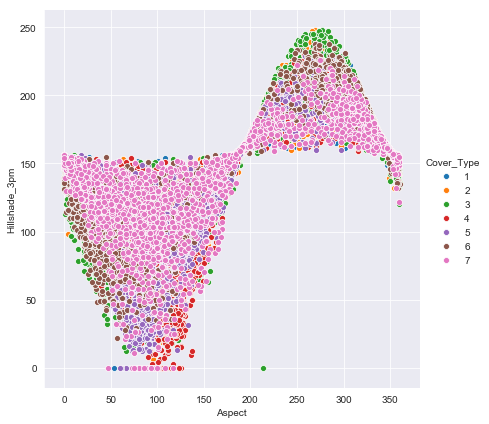

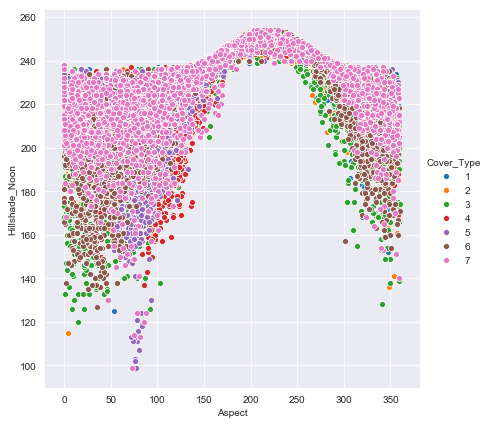

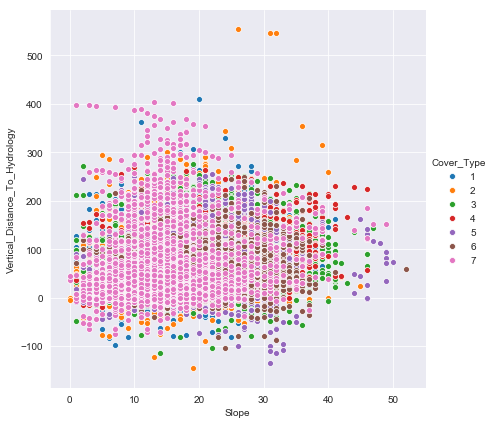

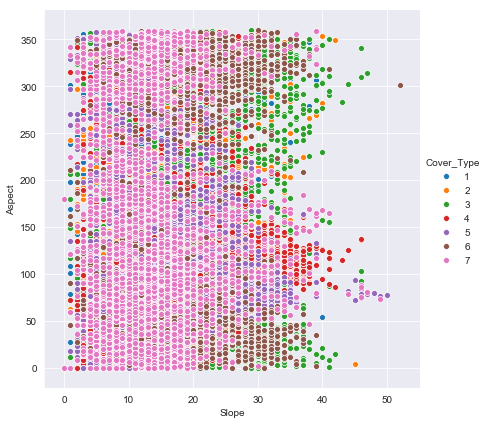

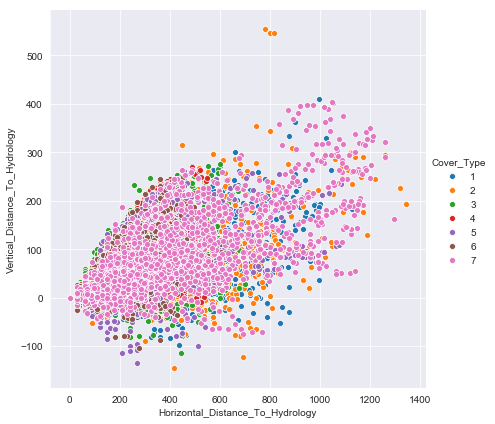

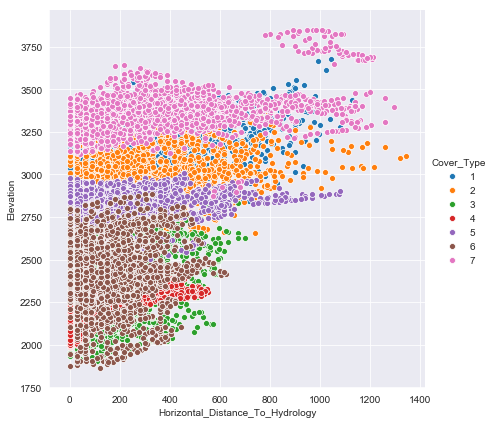

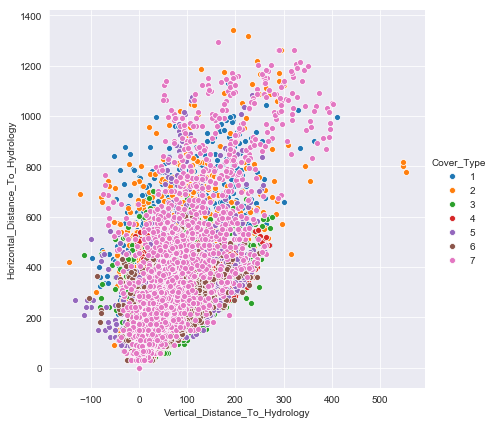

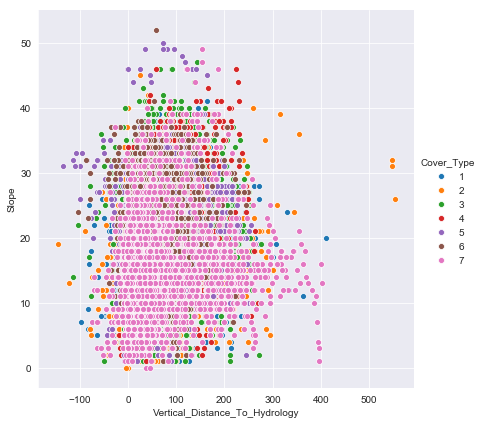

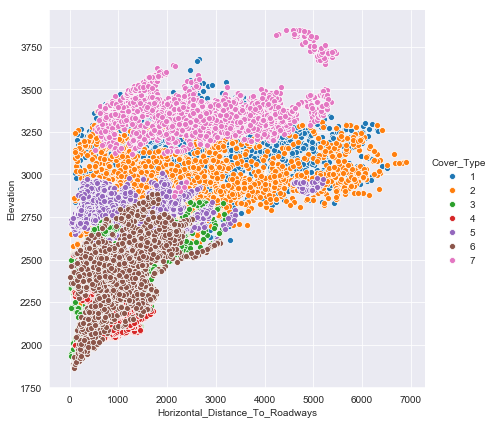

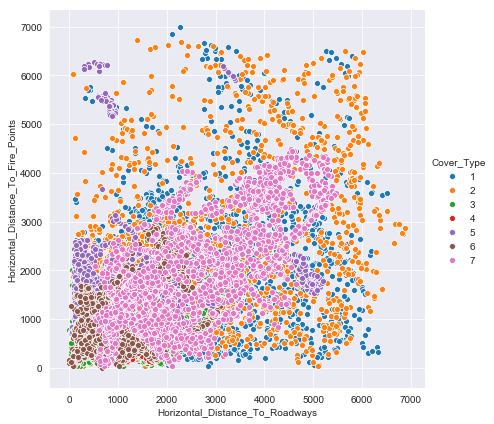

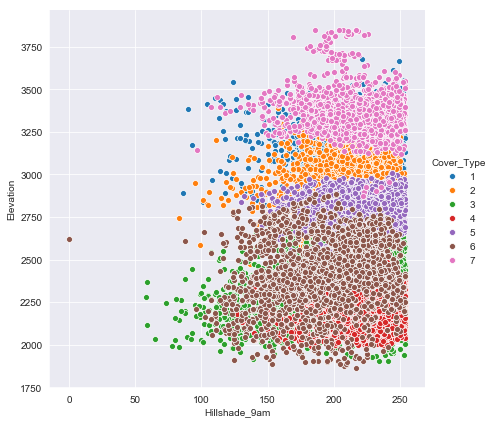

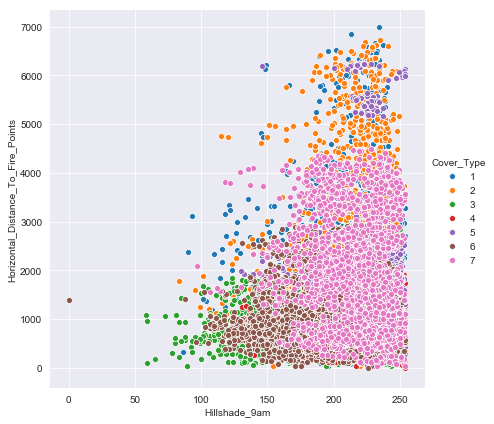

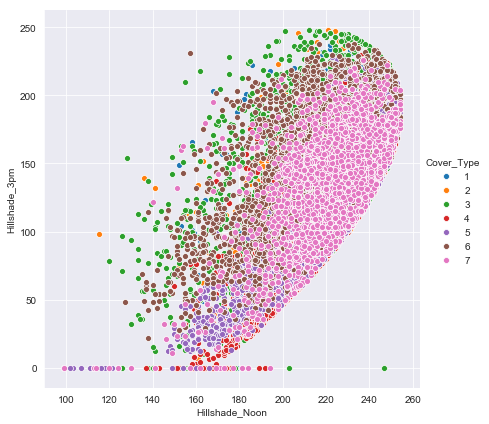

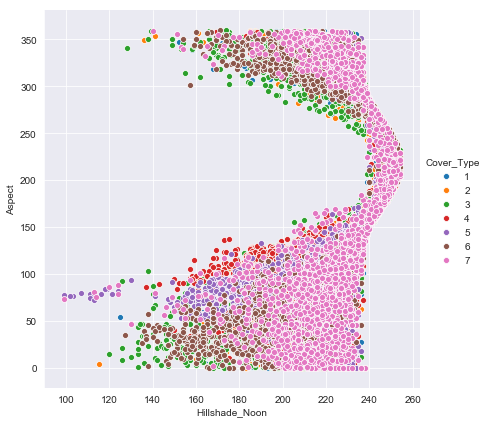

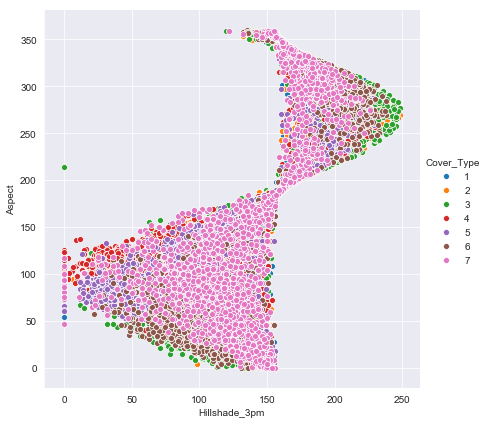

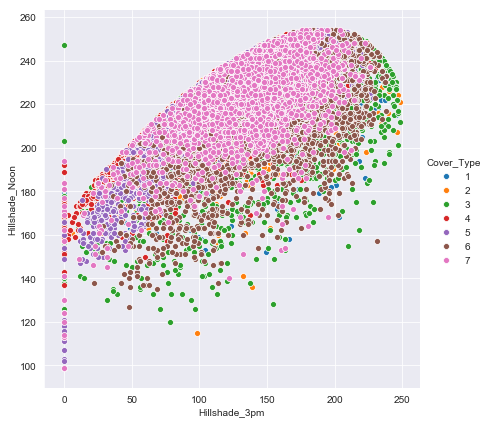

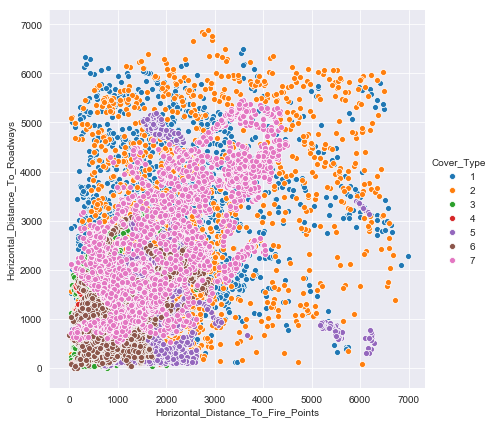

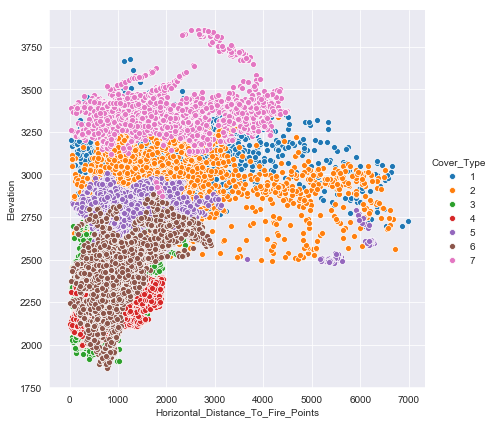

In [16]:
for f,t in top_corrs.items():
    sns.pairplot(train, x_vars=f, y_vars=t[0][0], hue='Cover_Type', height=6)
    sns.pairplot(train, x_vars=f, y_vars=t[0][1], hue='Cover_Type', height=6)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


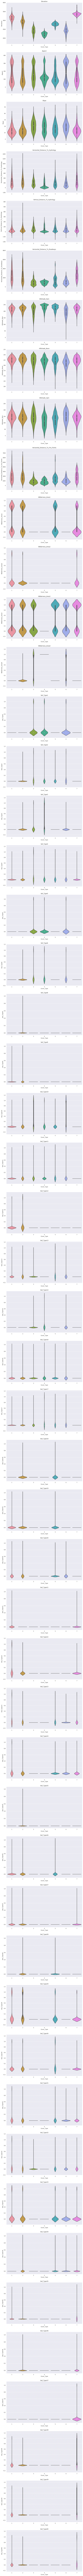

In [17]:
# Violin Plots to observe individual feature distributions by cover type
fig, axes = plt.subplots(len(ftrs), figsize=(12, 8*len(ftrs)))
for i,f in enumerate(ftrs):
    sns.violinplot(data=train, x=target_col, y=f, ax = axes[i])
    axes[i].set_title(f)

This is unnecessary for this project

In [21]:
col_dic = {'id': id_cols, 'cat_cols':cat_cols, 'int_cols': int_cols, 'target_col':target_col}
with open('clean_data/train_cols.json', 'w') as f:
    json.dump(col_dic, f)

In [22]:
train.to_csv('clean_data/train.csv', index=False)
test.to_csv('clean_data/test.csv', index=False)